Python模块中的numpy，这是一个处理数组的强大模块，而该模块也是其他数据分析模块（如pandas和scipy）的核心。

接下面将从这5个方面来介绍numpy模块的内容：

1）数组的创建

2）有关数组的属性和函数

3）数组元素的获取--普通索引、切片、布尔索引和花式索引

4）统计函数与线性代数运算

5）随机数的生成

 

# 数组的创建

numpy中使用array()函数创建数组,array的首个参数一定是一个序列，可以是元组也可以是列表。

## 一维数组的创建

可以使用numpy中的arange()函数创建一维有序数组，它是内置函数range的扩展版。

In [2]:
import numpy as np
ls1 = range(10)
list(ls1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
type(ls1)

range

In [4]:
ls2 = np.arange(10)
list(ls2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
type(ls2)

numpy.ndarray

通过arange生成的序列就不是简简单单的列表类型了，而是一个一维数组


如果一维数组不是一个规律的有序元素，而是人为的输入，就需要array()函数创建了

In [6]:
arr1 = np.array((1, 20, 13, 28, 22))
arr1

array([ 1, 20, 13, 28, 22])

In [7]:
type(arr1)

numpy.ndarray

上面是由元组序列构成的一维数组

In [8]:
arr2 = np.array([1, 1, 2, 3, 5, 8, 13, 21])
arr2

array([ 1,  1,  2,  3,  5,  8, 13, 21])

In [9]:
type(arr2)

numpy.ndarray

上面是由列表序列构成的一维数组

## 二维数组的创建
二维数组的创建，其实就是列表套列表元组套元组

In [10]:
arr3 = np.array(((1,1,2,3),(5,8,13,21),(34,55,89,144)))
arr3

array([[  1,   1,   2,   3],
       [  5,   8,  13,  21],
       [ 34,  55,  89, 144]])

上面使用元组套元组的方式

In [11]:
arr4 = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
arr4

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

上面使用列表套列表的方式
对于高维数组在将来的数据分析中用的比较少，这里关于高维数组的创建就不赘述了，构建方法仍然是嵌套

上面介绍的都是人为设定的一维、二维或高维数组，numpy中也提供了集中特殊的数组，他们是：

返回一维元素全为1的数组

In [12]:
np.ones(3)

array([1., 1., 1.])

返回元素全为1的3x4维数组

In [13]:
np.ones([3,4])

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

返回一维元素全为0的数组

In [14]:
np.zeros(3)

array([0., 0., 0.])

返回元素全为0的3x4维数组

In [15]:
np.zeros([3,4])

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

返回一维空数组

In [16]:
np.empty(3)

array([0., 0., 0.])

返回3x4维空数组

In [17]:
np.empty([3,4])

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## 有关数组的属性和函数

当一个数组构建好后，我们看看数组本身的操作又有哪些属性和函数：

In [18]:
arr3

array([[  1,   1,   2,   3],
       [  5,   8,  13,  21],
       [ 34,  55,  89, 144]])

In [19]:
arr3.shape #shape方法返回数组的行数和列数

(3, 4)

In [20]:
arr3.dtype #dtype 方法返回数组的数据类型

dtype('int32')

In [21]:
a = arr3.ravel() #通过ravel的方法将数组拉直
a

array([  1,   1,   2,   3,   5,   8,  13,  21,  34,  55,  89, 144])

In [22]:
b = arr3.flatten() #通过flatten的方法将数组拉直
b

array([  1,   1,   2,   3,   5,   8,  13,  21,  34,  55,  89, 144])

两者的区别在于ravel方法生成的是原数组的视图，无需占有内存空间，但视图的改变会影响到原数组的变化。

通过下面的例子也就能明白

In [23]:
b[:3] = 0
arr3

array([[  1,   1,   2,   3],
       [  5,   8,  13,  21],
       [ 34,  55,  89, 144]])

通过更改b的值，原数组没有变化

In [24]:
a[:3] = 0
arr3

array([[  0,   0,   0,   3],
       [  5,   8,  13,  21],
       [ 34,  55,  89, 144]])

a的变化会导致原数组的变化

In [25]:
arr4

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [26]:
arr4.ndim #返回数组的维度

2

In [27]:
arr4.size #返回数组的个数

12

In [28]:
arr4.T # 返回数组的转置结果

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

如果数组的数据类型为复数的话，real方法可以返回数组的实部，imag方法返回复数的虚部

介绍完数组的一些方法后，接下来我们看看数组自身有哪些函数可操作

In [29]:
len(arr4) # 返回数组有多少行

3

In [30]:
arr3

array([[  0,   0,   0,   3],
       [  5,   8,  13,  21],
       [ 34,  55,  89, 144]])

In [31]:
arr4

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [32]:
np.hstack((arr3,arr4))

array([[  0,   0,   0,   3,   1,   2,   3,   4],
       [  5,   8,  13,  21,   5,   6,   7,   8],
       [ 34,  55,  89, 144,   9,  10,  11,  12]])

横向拼接arr3和arr4两个数组，但必须满足两个数组的行数形同

In [33]:
np.vstack((arr3,arr4))

array([[  0,   0,   0,   3],
       [  5,   8,  13,  21],
       [ 34,  55,  89, 144],
       [  1,   2,   3,   4],
       [  5,   6,   7,   8],
       [  9,  10,  11,  12]])

纵向拼接arr3和arr4两个数组，但必须满足两个数组的列相同

In [34]:
np.column_stack((arr3,arr4)) #与vstack效果一直

array([[  0,   0,   0,   3,   1,   2,   3,   4],
       [  5,   8,  13,  21,   5,   6,   7,   8],
       [ 34,  55,  89, 144,   9,  10,  11,  12]])

reshape()函数和resize()函数可以重新设置数组的行数和列数：

In [35]:
arr5 = np.array(np.arange(24))
arr5

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [36]:
a = arr5.reshape(4,6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

通过reshape函数将一维数组设置为二维数组，且为4行6列的数组

In [37]:
a.resize(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

通过resize函数会直接改变原数组的形状

数组转换：tolist将数组转化为列表，astype()强制转换数组的类型，下面是两个函数的例子：

In [38]:
b = a.tolist()
type(b)

list

In [39]:
c = a.astype(float)
c

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.],
       [16., 17., 18., 19.],
       [20., 21., 22., 23.]])

In [40]:
a.dtype

dtype('int32')

In [41]:
c.dtype

dtype('float64')

## 数组元素的获取

通过索引和切片的方式获取数组元素，一维数组元素的获取与列表、元组的获取方式一样：

In [42]:
arr7 = np.array(np.arange(10))
arr7

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [43]:
arr7[3] #获取第四个元素

3

In [44]:
arr7[:3] #获取前三个元素

array([0, 1, 2])

In [45]:
arr7[3:] #获取第4个元素之后的所有元素

array([3, 4, 5, 6, 7, 8, 9])

In [46]:
arr7[-2:] # 获取末尾的2个元素

array([8, 9])

In [47]:
arr7[::2] #从第一个元素开始，获取步长为2的所有元素

array([0, 2, 4, 6, 8])

## 二维数组元素的获取

In [48]:
arr8 = np.array(np.arange(12)).reshape(3,4)
arr8

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [49]:
arr8[1] # 返回数组的第二行

array([4, 5, 6, 7])

In [50]:
arr8[:2] # 返回数组的前两行

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [51]:
arr8[[0,2]] # 返回指定的第1行和第3行

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

In [52]:
arr8[:,0] # 返回数组的第1列

array([0, 4, 8])

In [53]:
arr8[:,-2:] # 返回数组的后2列

array([[ 2,  3],
       [ 6,  7],
       [10, 11]])

In [54]:
arr8[:,[0,2]] #返回数组的第1列和第3列

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [55]:
arr8[1,2] #返回数组中第2行第3行对应的元素

6

布尔索引，即索引值为True和False,需要注意的是布尔索引必须输数组对象

In [56]:
log = np.array([True,False,False,True,True,False])

In [57]:
arr9 = np.array(np.arange(24)).reshape(6,4)
arr9

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [58]:
arr9[log] #返回所有为True的对应行

array([[ 0,  1,  2,  3],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [59]:
arr9[-log] # 通过符号筛选出所有为False的对应行

TypeError: The numpy boolean negative, the `-` operator, is not supported, use the `~` operator or the logical_not function instead.

第一个场景，一维数组表示区域，二维数组表示观测值，如何选取目标区域的观测？

In [60]:
area = np.array(['A','B','A','C','A','B','D'])
area

array(['A', 'B', 'A', 'C', 'A', 'B', 'D'], dtype='<U1')

In [61]:
observes = np.array(np.arange(21)).reshape(7,3)
observes

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20]])

In [62]:
observes[area == 'A']

array([[ 0,  1,  2],
       [ 6,  7,  8],
       [12, 13, 14]])

返回所有A区域的观测

In [63]:
observes[(area == 'A')|(area == 'D')] #条件值需要在&(and),|(or)两端用圆括号括起来

array([[ 0,  1,  2],
       [ 6,  7,  8],
       [12, 13, 14],
       [18, 19, 20]])

返回所有A区域和D区域的观测

当然，布尔索引也可以与普通索引或切片混合使用：

In [64]:
observes[area == 'A'][:,[0,2]]

array([[ 0,  2],
       [ 6,  8],
       [12, 14]])

返回A区域的所有行，且只获取第1列与第3列的数据

花式索引：实际上就是将数组作为索引将原数组的元素提取出来

In [65]:
arr10 = np.arange(1,29).reshape(7,4)
arr10

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20],
       [21, 22, 23, 24],
       [25, 26, 27, 28]])

In [66]:
arr10[[4,1,3,5]] #按照指定顺序返回指定行

array([[17, 18, 19, 20],
       [ 5,  6,  7,  8],
       [13, 14, 15, 16],
       [21, 22, 23, 24]])

In [67]:
arr10[[4,1,5]][:,[0,2,3]] #返回指定的行与列

array([[17, 19, 20],
       [ 5,  7,  8],
       [21, 23, 24]])

In [68]:
arr10[[4,1,5],[0,2,3]]

array([17,  7, 24])

请注意！这与上面的返回结果是截然不同的，上面返回的是二维数组，而这条命令返回的是一维数组

如果想使用比较简单的方式返回指定行以列的二维数组的话，可以使用ix_()函数

In [69]:
arr10[np.ix_([4,1,5],[0,2,3])]

array([[17, 19, 20],
       [ 5,  7,  8],
       [21, 23, 24]])

## 统计函数与线性代数运算

统计中常用的聚合函数有;最小值、最大值、中位数、均值、方差、标准差等。首先来看看数组元素几倍的运算

In [70]:
arr11 = 5-np.arange(1,13).reshape(4,3)

In [71]:
arr12 = np.random.randint(1,10,size = 12).reshape(4,3)

In [72]:
arr11

array([[ 4,  3,  2],
       [ 1,  0, -1],
       [-2, -3, -4],
       [-5, -6, -7]])

In [73]:
arr12

array([[7, 2, 6],
       [8, 4, 9],
       [7, 1, 1],
       [6, 5, 6]])

In [74]:
arr11 ** 2 #计算每个元素的平方

array([[16,  9,  4],
       [ 1,  0,  1],
       [ 4,  9, 16],
       [25, 36, 49]], dtype=int32)

In [75]:
np.sqrt(arr11)  #计算每个元素的平方根

D:\installed\develop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[2.        , 1.73205081, 1.41421356],
       [1.        , 0.        ,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan]])

由于负值的平方根没有意义，返回nan

In [76]:
np.exp(arr11) # 计算每个元素的指数值

array([[5.45981500e+01, 2.00855369e+01, 7.38905610e+00],
       [2.71828183e+00, 1.00000000e+00, 3.67879441e-01],
       [1.35335283e-01, 4.97870684e-02, 1.83156389e-02],
       [6.73794700e-03, 2.47875218e-03, 9.11881966e-04]])

In [77]:
np.log(arr12) #计算每个元素的自然对数

array([[1.94591015, 0.69314718, 1.79175947],
       [2.07944154, 1.38629436, 2.19722458],
       [1.94591015, 0.        , 0.        ],
       [1.79175947, 1.60943791, 1.79175947]])

In [78]:
np.abs(arr11) #计算每个元素的绝对值

array([[4, 3, 2],
       [1, 0, 1],
       [2, 3, 4],
       [5, 6, 7]])

相同形状数组元素的操作

In [79]:
arr11+arr12

array([[11,  5,  8],
       [ 9,  4,  8],
       [ 5, -2, -3],
       [ 1, -1, -1]])

In [80]:
arr11-arr12

array([[ -3,   1,  -4],
       [ -7,  -4, -10],
       [ -9,  -4,  -5],
       [-11, -11, -13]])

In [81]:
arr11*arr12

array([[ 28,   6,  12],
       [  8,   0,  -9],
       [-14,  -3,  -4],
       [-30, -30, -42]])

In [82]:
arr11/arr12

array([[ 0.57142857,  1.5       ,  0.33333333],
       [ 0.125     ,  0.        , -0.11111111],
       [-0.28571429, -3.        , -4.        ],
       [-0.83333333, -1.2       , -1.16666667]])

In [83]:
arr11//arr12

array([[ 0,  1,  0],
       [ 0,  0, -1],
       [-1, -3, -4],
       [-1, -2, -2]], dtype=int32)

In [84]:
arr11%arr12

array([[4, 1, 2],
       [1, 0, 8],
       [5, 0, 0],
       [1, 4, 5]], dtype=int32)

接下来看统计运算函数

In [85]:
np.sum(arr11) # 计算所有元素的和

-18

In [86]:
np.sum(arr11,axis = 0) #对每一列求和

array([ -2,  -6, -10])

In [87]:
np.sum(arr11,axis = 1) #对每一行求和

array([  9,   0,  -9, -18])

In [88]:
np.cumsum(arr11) # 对每一个元素求累积和（从上到下，从左到右的顺序）

array([  4,   7,   9,  10,  10,   9,   7,   4,   0,  -5, -11, -18],
      dtype=int32)

In [89]:
np.cumsum(arr11, axis = 0) #计算每一列的累积和，并返回二维数组

array([[  4,   3,   2],
       [  5,   3,   1],
       [  3,   0,  -3],
       [ -2,  -6, -10]], dtype=int32)

In [90]:
np.cumsum(arr11, axis = 1) #计算每一行的累积和，并返回二维数组

array([[  4,   7,   9],
       [  1,   1,   0],
       [ -2,  -5,  -9],
       [ -5, -11, -18]], dtype=int32)

In [91]:
np.max(arr11)

4

In [92]:
np.max(arr11,axis = 0)#计算每一列的最大值

array([4, 3, 2])

In [93]:
np.mean(arr11)

-1.5

In [94]:
np.mean(arr11,axis = 1)

array([ 3.,  0., -3., -6.])

In [95]:
np.median(arr11)

-1.5

In [96]:
np.median(arr11, axis = 0)

array([-0.5, -1.5, -2.5])

In [97]:
np.var(arr12)

6.472222222222221

In [98]:
np.std(arr12, axis = 1)

array([2.1602469 , 2.1602469 , 2.82842712, 0.47140452])

numpy中的统计函数运算是非常灵活的，既可以计算所有元素的统计值，也可以计算指定行或列的统计指标。还有其他常用的函数，如符号函数sign，ceil(>=x的最小整数)，floor(<=x的最大整数)，modf(将浮点数的整数部分与小数部分分别存入两个独立的数组)，cos，arccos，sin，arcsin，tan，arctan等。

 

让我很兴奋的一个函数是where()，它类似于Excel中的if函数，可以进行灵活的变换：

In [99]:
arr11

array([[ 4,  3,  2],
       [ 1,  0, -1],
       [-2, -3, -4],
       [-5, -6, -7]])

In [100]:
np.where(arr11 < 0,'negtive','positive')

array([['positive', 'positive', 'positive'],
       ['positive', 'positive', 'negtive'],
       ['negtive', 'negtive', 'negtive'],
       ['negtive', 'negtive', 'negtive']], dtype='<U8')

当然，np.where还可以嵌套使用，完成复杂的运算

## 其他函数

同样，numpy也跟R语言一样，可以非常方便的进行线性代数方面的计算，如行列式、逆、迹、特征根、特征向量等。但需要注意的是，有关线性代数的函数并不在numpy中，而是numpy的子例linalg中。

In [102]:
arr13 = np.array([[1,2,3,5],[2,4,1,6],[1,1,4,3],[2,5,4,1]])
arr13

array([[1, 2, 3, 5],
       [2, 4, 1, 6],
       [1, 1, 4, 3],
       [2, 5, 4, 1]])

In [103]:
np.linalg.det(arr13) #返回方阵的行列式

51.00000000000002

In [104]:
np.linalg.inv(arr13) # 放回方阵的逆

array([[-2.23529412,  1.05882353,  1.70588235, -0.29411765],
       [ 0.68627451, -0.25490196, -0.7254902 ,  0.2745098 ],
       [ 0.19607843, -0.21568627,  0.07843137,  0.07843137],
       [ 0.25490196,  0.01960784, -0.09803922, -0.09803922]])

In [105]:
np.trace(arr13) #返回方阵的迹（对角线元素之和），注意迹的求解不在linalg子例程中

10

In [106]:
np.linalg.eig(arr13)    #返回由特征根和特征向量组成的元组

(array([11.35035004, -3.99231852, -0.3732631 ,  3.01523159]),
 array([[-0.4754174 , -0.48095078, -0.95004728,  0.19967185],
        [-0.60676806, -0.42159999,  0.28426325, -0.67482638],
        [-0.36135292, -0.16859677,  0.08708826,  0.70663129],
        [-0.52462832,  0.75000995,  0.09497472, -0.07357122]]))

In [107]:
np.linalg.qr(arr13) #返回方阵的QR分解

(array([[-0.31622777, -0.07254763, -0.35574573, -0.87645982],
        [-0.63245553, -0.14509525,  0.75789308, -0.06741999],
        [-0.31622777, -0.79802388, -0.38668014,  0.33709993],
        [-0.63245553,  0.580381  , -0.38668014,  0.33709993]]),
 array([[-3.16227766, -6.64078309, -5.37587202, -6.95701085],
        [ 0.        ,  1.37840488, -1.23330963, -3.04700025],
        [ 0.        ,  0.        , -3.40278524,  1.22190924],
        [ 0.        ,  0.        ,  0.        , -3.4384193 ]]))

In [108]:
np.linalg.svd(arr13)    #返回方阵的奇异值分解

(array([[-0.50908395,  0.27580803,  0.35260559, -0.73514132],
        [-0.59475561,  0.4936665 , -0.53555663,  0.34020325],
        [-0.39377551, -0.10084917,  0.70979004,  0.57529852],
        [-0.48170545, -0.81856751, -0.29162732, -0.11340459]]),
 array([11.82715609,  4.35052602,  3.17710166,  0.31197297]),
 array([[-0.25836994, -0.52417446, -0.47551003, -0.65755329],
        [-0.10914615, -0.38326507, -0.54167613,  0.74012294],
        [-0.18632462, -0.68784764,  0.69085326,  0.12194478],
        [ 0.94160248, -0.32436807, -0.05655931, -0.07050652]]))

In [109]:
np.dot(arr13,arr13)     #方阵的正真乘积运算

array([[18, 38, 37, 31],
       [23, 51, 38, 43],
       [13, 25, 32, 26],
       [18, 33, 31, 53]])

In [110]:
arr14 = np.array([[1,-2,1],[0,2,-8],[-4,5,9]])

In [111]:
vector = np.array([0,8,-9])

In [112]:
np.linalg.solve(arr14,vector)

array([29., 16.,  3.])

## 随机数生成

统计学中经常会讲到数据的分布特征，如正态分布、指数分布、卡方分布、二项分布、泊松分布等，下面就讲讲有关分布的随机数生成。

正态分布直方图

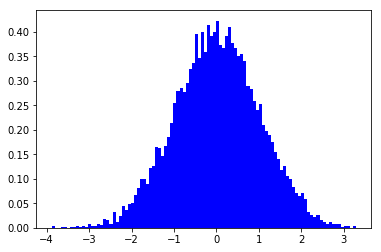

In [133]:
import matplotlib.pyplot as plt #用于绘图的模块
np.random.seed(1234)    #设置随机种子
N = 10000   #随机产生的样本量
randnorm = np.random.normal(size = N)   #生成正态随机数
counts, bins, path = plt.hist(randnorm, bins = 100, density = True, color = 'blue')  #绘制直方图

以上将直方图的频数和组距存放在counts和bins内。

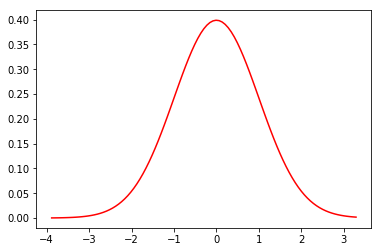

In [132]:
sigma = 1; mu = 0
norm_dist = (1/np.sqrt(2*sigma*np.pi))*np.exp(-((bins-mu)**2)/2)    #正态分布密度函数
plt.plot(bins,norm_dist,color = 'red') #绘制正态分布密度函数图

### 使用二项分布进行赌博

同时抛弃9枚硬币，如果正面朝上少于5枚，则输掉8元，否则就赢8元。如果手中有1000元作为赌资，请问赌博10000次后可能会是什么情况呢？

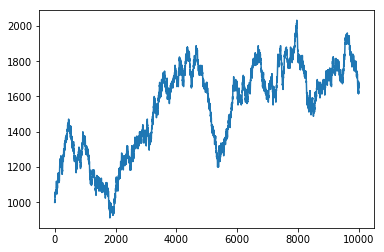

In [134]:
np.random.seed(1234)
binomial = np.random.binomial(9,0.5,10000)  #生成二项分布随机数
money = np.zeros(10000) #生成10000次赌资的列表
money[0] = 1000 #首次赌资为1000元
for i in range(1,10000):
    if binomial[i] < 5:
        money[i] = money[i-1] - 8  
#如果少于5枚正面，则在上一次赌资的基础上输掉8元
    else:
        money[i] = money[i-1] + 8  

#如果至少5枚正面，则在上一次赌资的基础上赢取8元
matplotlib.pyplot.plot(np.arange(10000), money)

### 使用随机整数实现随机游走

一个醉汉在原始位置上行走10000步后将会在什么地方呢？如果他每走一步是随机的，即下一步可能是1也可能是-1。

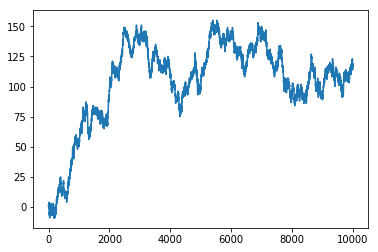

In [135]:
np.random.seed(1234)    #设定随机种子
position = 0    #设置初始位置
walk = []   #创建空列表
steps = 10000   #假设接下来行走10000步
for i in np.arange(steps):
    step = 1 if np.random.randint(0,2) else -1  #每一步都是随机的
    position = position + step  #对每一步进行累计求和
    walk.append(position)   #确定每一步所在的位置
matplotlib.pyplot.plot(np.arange(10000), walk)   #绘制随机游走图

上面的代码还可以写成（结合前面所讲的where函数，cumsum函数）：

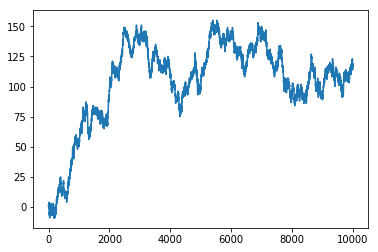

In [136]:
np.random.seed(1234)
step = np.where(np.random.randint(0,2,10000)>0,1,-1)
position = np.cumsum(step)
matplotlib.pyplot.plot(np.arange(10000), position)